These are following features we are using to predict Heart Disease

1. age (#)
2. sex : 1= Male, 0= Female (Binary)
3. (cp)chest pain type :Value 0: typical angina ,Value 1: atypical angina, Value 2: non-anginal pain , Value 3: asymptomatic)
4. (trestbps) resting blood pressure (#) normal range
5. (chol) serum cholestoral in mg/dl  (#)
6. (fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)
7. (restecg) resting electrocardiographic results(values 0,1,2)
8. (thalach) maximum heart rate achieved (#)
9. (exang) exercise induced angina (binary) (1 = yes; 0 = no) 
10. (oldpeak) = ST depression induced by exercise relative to rest (#) 
11. (slope) of the peak exercise ST segment (Ordinal) (Value 1: upsloping , Value 2: flat , Value 3: downsloping )
12. (ca) number of major vessels (0-3, Ordinal) colored by fluoroscopy 
13. (thal) maximum heart rate achieved - (Ordinal): 1 = normal; 2 = fixed defect; 3 = reversable defect

and in dataset target shows wheather a person having heart disease or not (negative=0, Positive=1)

# **Importing necessary libraries**

**numpy** for faster numerical calculation

**Pandas** for data manupulation and analysis

**matplotlib & seaborn** for Data Visualzation (i.e.plot different kinds of graph)


In [95]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Cleaning**

In [96]:
data = pd.read_csv("/content/heartDisease.csv")

data.head(25)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [97]:
print("(Rows, columns): " + str(data.shape))
data.columns

(Rows, columns): (303, 14)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [98]:
data.nunique(axis=0)      # returns the number of unique values for each variable.

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [99]:
data.describe()  #summarizes the count, mean, standard deviation, min, and max for numeric variables.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [100]:
print(data.isna().sum()) # Display the Missing Values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Luckily we have no missing data to handle! so we can move further

# **Correlations** 

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


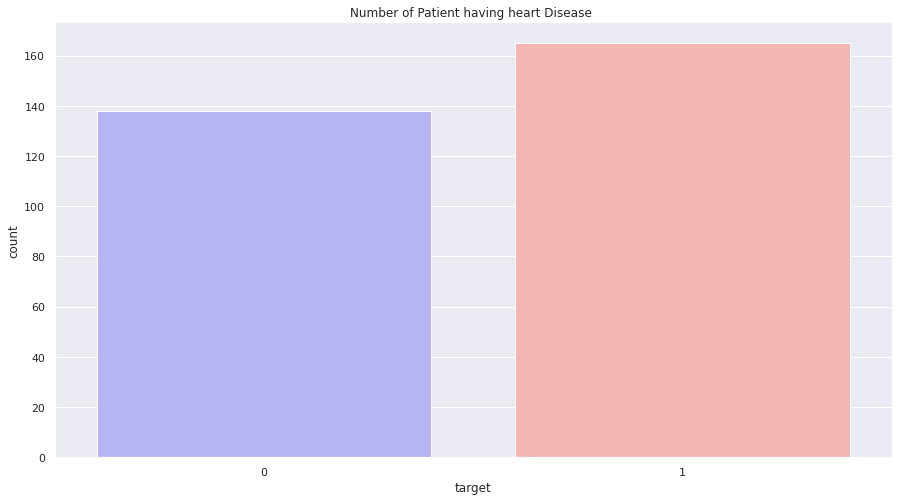

In [101]:
sns.countplot(x="target", data=data, palette="bwr")

countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))
plt.title("Number of Patient having heart Disease ")
plt.show()

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


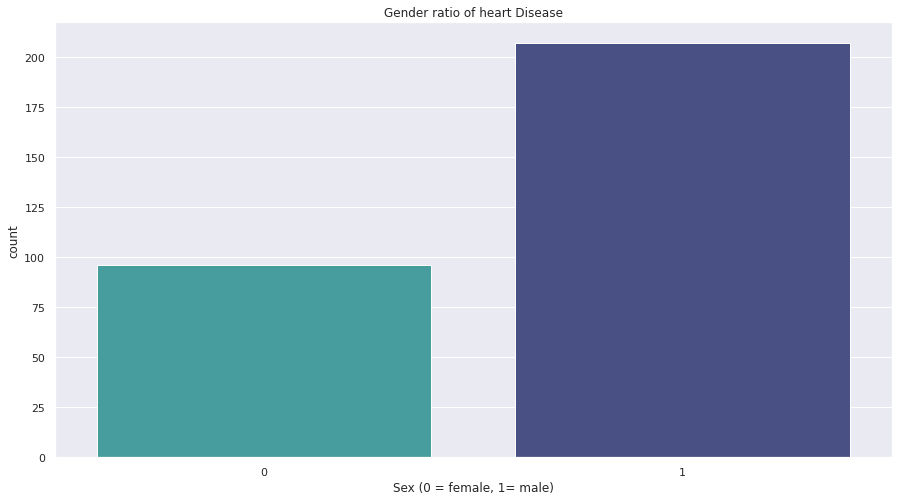

In [102]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")

countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.sex))*100)))
plt.title("Gender ratio of heart Disease")

plt.show()

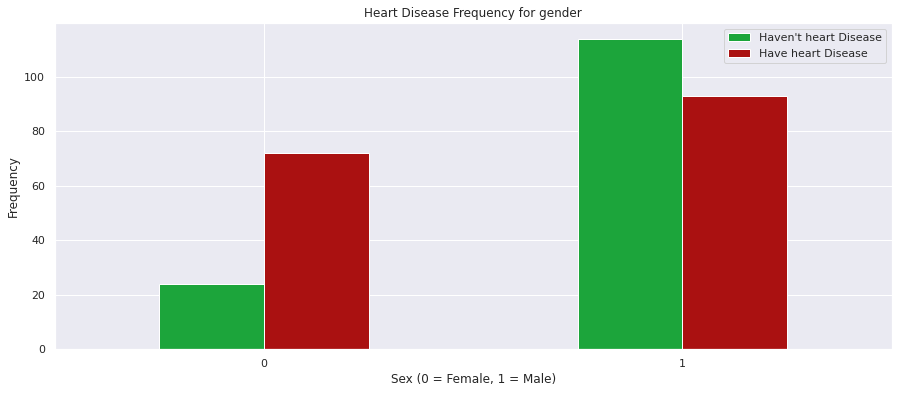

In [103]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't heart Disease", "Have heart Disease"])
plt.ylabel('Frequency')
plt.show()

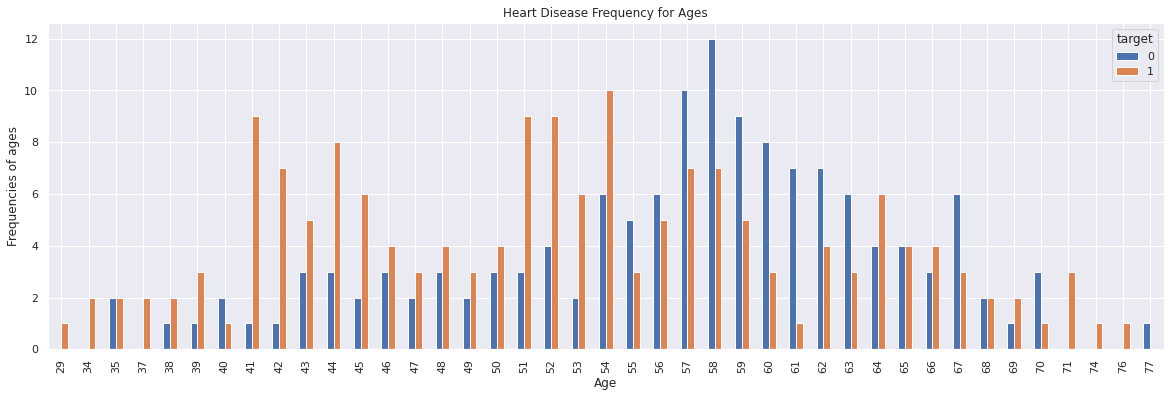

In [104]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequencies of ages')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

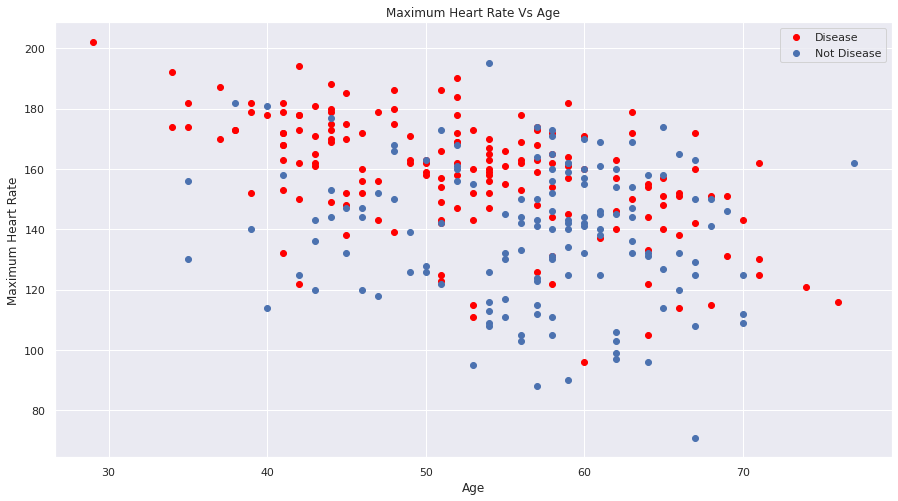

In [105]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Maximum Heart Rate Vs Age")
plt.show()

Text(33.31697500000001, 0.5, 'ST depression')

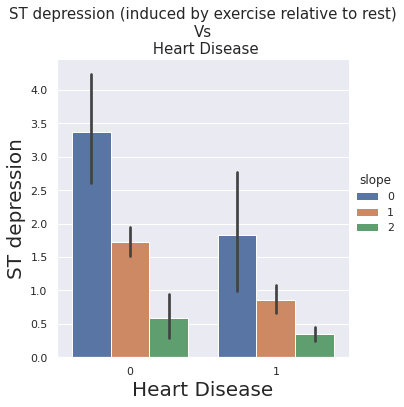

In [106]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=data);

plt.title('ST depression (induced by exercise relative to rest)\nVs\n Heart Disease',size=15)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

ST segment depression occurs because when the ventricle is at rest and therefore repolarized. If the trace in the ST segment is abnormally low below the baseline, this can lead to this Heart Disease. This is supports the plot above because low ST Depression yields people at greater risk for heart disease. While a high ST depression is considered normal & healthy. The "slope" hue, refers to the peak exercise ST segment, with values: 0: upsloping , 1: flat , 2: downsloping). Both positive & negative heart disease patients exhibit equal distributions of the 3 slope categories.

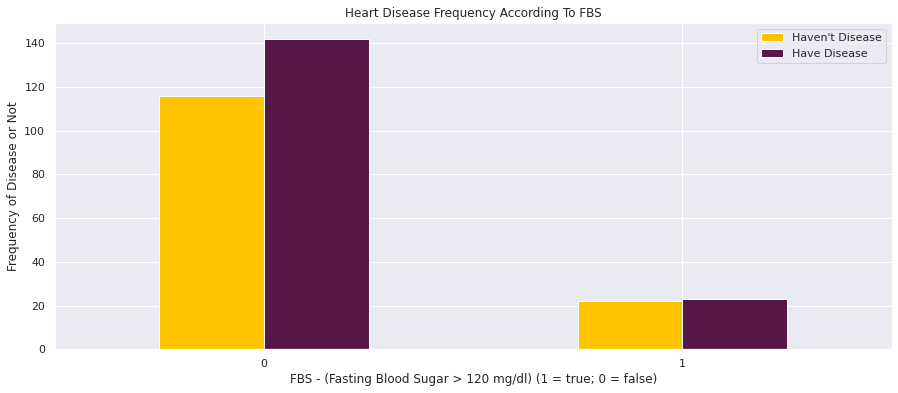

In [107]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

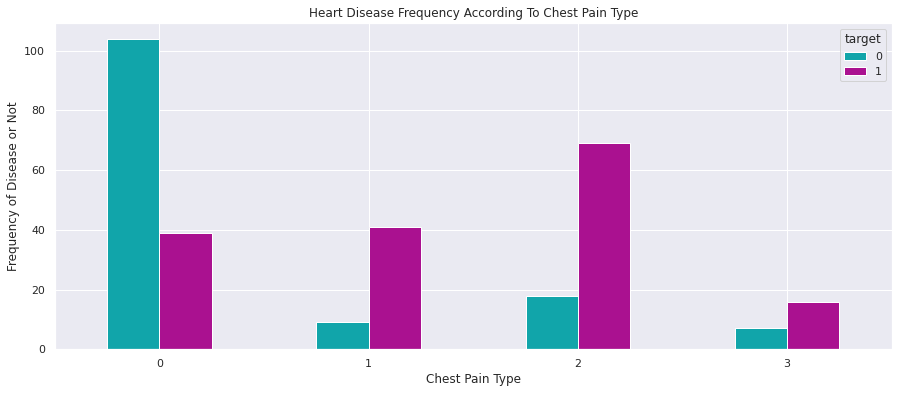

In [108]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

**Correlation Matrix-**
let's you see correlations between all variables. Within seconds, you can see whether something is positivly or negativly correlated with our predictor (target)

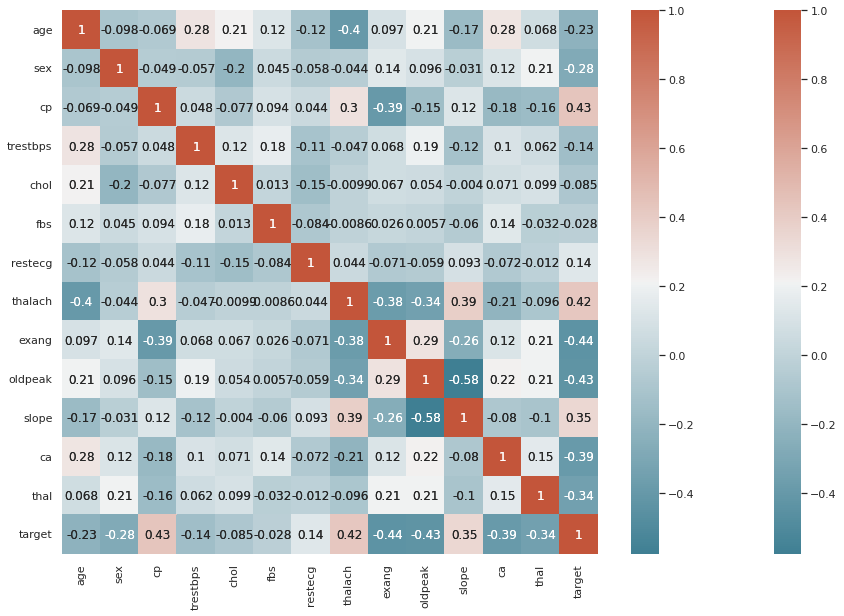

In [109]:
# calculate correlation matrix

corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

We can see there is a positive correlation between chest pain (cp) & target (our predictor). This makes sense since, The greater amount of chest pain results in a greater chance of having heart disease. Cp (chest pain), is a ordinal feature with 4 values: Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic. 

In addition, we see a negative correlation between exercise induced angina (exang) & our predictor. This makes sense because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow. 




# **Filtering data by positive & negative Heart Disease patient**

**Filtering data by positive Heart Disease patient(Data Spliting)**  

In [110]:
pos_data = data[data['target']==1]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


**Filtering data by negative Heart Disease patient**

In [111]:
neg_data = data[data['target']==0]
neg_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


# **TRAINING AND TESTING**

In [112]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Modeling**

Model 1: Logistic Regression

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

Logistic Regression Accuracy Score : 73.77%


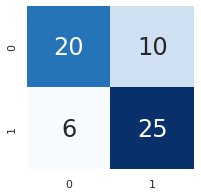

In [115]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model

y_head_model1 = model1.predict(x_test)
cm_model1 = confusion_matrix(y_test,y_head_model1)
plt.figure(figsize=(3,3))
sns.heatmap(cm_model1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy


accuracies = {}
acc1 = model1.score(x_test,y_test)*100
accuracies['Logistic Regression'] = acc1
print("Logistic Regression Accuracy Score : {:.2f}%".format(acc1))



Model 2: Naives Bayes Classifier

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

Naives Bayes Classifier Accuracy Score : 77.05%


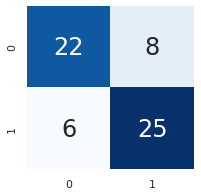

In [116]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

model2 = GaussianNB() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_head_model2 = model2.predict(x_test)
cm_model2 = confusion_matrix(y_test,y_head_model2)


plt.figure(figsize=(3,3))
sns.heatmap(cm_model2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy


accuracies = {}
acc2 = model2.score(x_test,y_test)*100
accuracies['Naives Bayes Classifier'] = acc2
print("Naives Bayes Classifier Accuracy Score : {:.2f}%".format(acc2))


Model 3: K-NN (K-Nearest Neighbors)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

K-Nearest Neighbors Accuracy Score : 75.41%


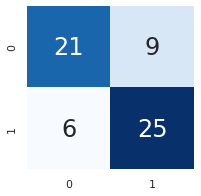

In [117]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

model3 = KNeighborsClassifier() # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_head_model3 = model3.predict(x_test)
cm_model3 = confusion_matrix(y_test,y_head_model3)

plt.figure(figsize=(3,3))
sns.heatmap(cm_model3,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

accuracies = {}
acc3 = model3.score(x_test,y_test)*100
accuracies['K-Nearest Neighbors'] = acc3
print("K-Nearest Neighbors Accuracy Score : {:.2f}%".format(acc3))

Model 4: Decision Trees

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

Decision Trees Accuracy Score : 68.85%


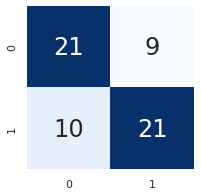

In [118]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model4 = DecisionTreeClassifier(random_state=1) # get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_head_model4 = model4.predict(x_test)
cm_model4 = confusion_matrix(y_test,y_head_model4)

plt.figure(figsize=(3,3))
sns.heatmap(cm_model4,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

accuracies = {}
acc4 = model4.score(x_test,y_test)*100
accuracies['Decision Trees'] = acc4
print("Decision Trees Accuracy Score : {:.2f}%".format(acc4))

Model 5: Random Forest

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Random Forest Accuracy Score : 80.33%


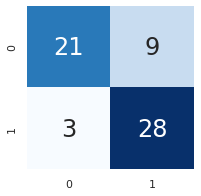

In [119]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model5 = RandomForestClassifier(random_state=1)# get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

y_head_model5 = model5.predict(x_test)
cm_model5 = confusion_matrix(y_test,y_head_model5)

plt.figure(figsize=(3,3))
sns.heatmap(cm_model5,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

accuracies = {}
acc5 = model5.score(x_test,y_test)*100
accuracies['Random Forest'] = acc5
print("Random Forest Accuracy Score : {:.2f}%".format(acc5))


Model 6: Support Vector Machine

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

Support Vector Machine Accuracy Score : 75.41%


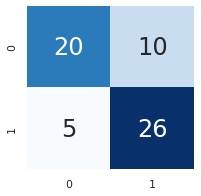

In [120]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

model6 = SVC(random_state=1) # get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_head_model6 = model6.predict(x_test)
cm_model6 = confusion_matrix(y_test,y_head_model6)

plt.figure(figsize=(3,3))
sns.heatmap(cm_model6,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

accuracies = {}
acc6 = model6.score(x_test,y_test)*100
accuracies['Support Vector Machine'] = acc6
print("Support Vector Machine Accuracy Score : {:.2f}%".format(acc6))

Model 7: XG Boost

              precision    recall  f1-score   support

           0       0.69      0.67      0.68        30
           1       0.69      0.71      0.70        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

XGB Classifier Accuracy Score : 68.85%


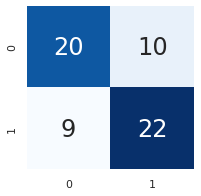

In [121]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

y_head_model7 = model7.predict(x_test)
cm_model7 = confusion_matrix(y_test,y_head_model7)

plt.figure(figsize=(3,3))
sns.heatmap(cm_model7,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

accuracies = {}
acc7 = model7.score(x_test,y_test)*100
accuracies['XGB Classifier'] = acc7
print("XGB Classifier Accuracy Score : {:.2f}%".format(acc7))

Model 8: Stochastic Gradient Descent

              precision    recall  f1-score   support

           0       0.68      0.63      0.66        30
           1       0.67      0.71      0.69        31

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.67      0.67      0.67        61

SGD Classifier Accuracy Score : 67.21%


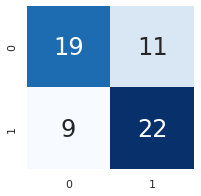

In [122]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

model8 = SGDClassifier(random_state=1)
model8.fit(x_train, y_train)
y_pred8 = model8.predict(x_test)
print(classification_report(y_test, y_pred8))

y_head_model8 = model8.predict(x_test)
cm_model8 = confusion_matrix(y_test,y_head_model8)

plt.figure(figsize=(3,3))
sns.heatmap(cm_model8,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

accuracies = {}
acc8 = model8.score(x_test,y_test)*100
accuracies['SGD Classifier'] = acc8
print("SGD Classifier Accuracy Score : {:.2f}%".format(acc8))


The accuracy score achieved using Logistic Regression is: 73.77049180327869 %
The accuracy score achieved using Naive Bayes is: 77.04918032786885 %
The accuracy score achieved using K-Nearest Neighbors is: 75.40983606557377 %
The accuracy score achieved using Decision Tree is: 68.85245901639344 %
The accuracy score achieved using Random Forest is: 80.32786885245902 %
The accuracy score achieved using Support Vector Machine is: 75.40983606557377 %
The accuracy score achieved using XG Boost is: 68.85245901639344 %
The accuracy score achieved using Stochastic Gradient Descent is: 67.21311475409836 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


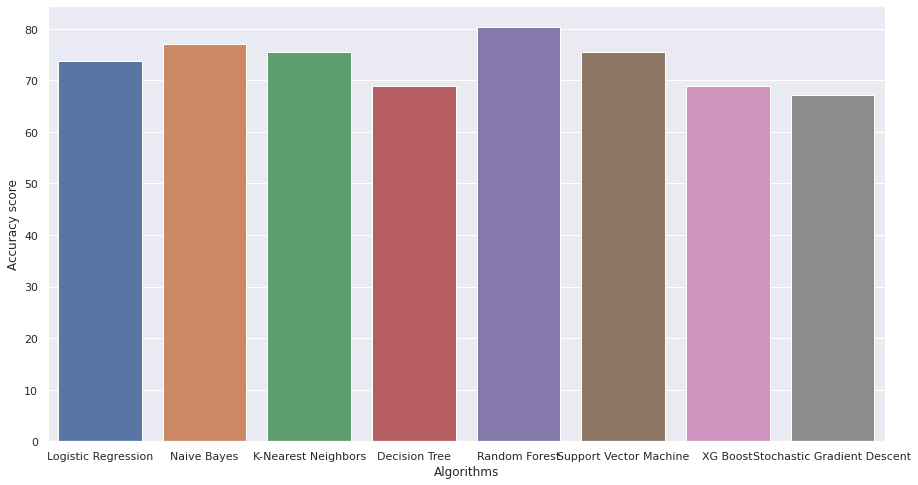

In [123]:
scores = [acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest","Support Vector Machine","XG Boost","Stochastic Gradient Descent"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)



# **Feature Importance**

In [124]:
# get importance
importance = model5.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07814
Feature: 1, Score: 0.04206
Feature: 2, Score: 0.16580
Feature: 3, Score: 0.07477
Feature: 4, Score: 0.07587
Feature: 5, Score: 0.00828
Feature: 6, Score: 0.02014
Feature: 7, Score: 0.12772
Feature: 8, Score: 0.06950
Feature: 9, Score: 0.09957
Feature: 10, Score: 0.04677
Feature: 11, Score: 0.11667
Feature: 12, Score: 0.07473


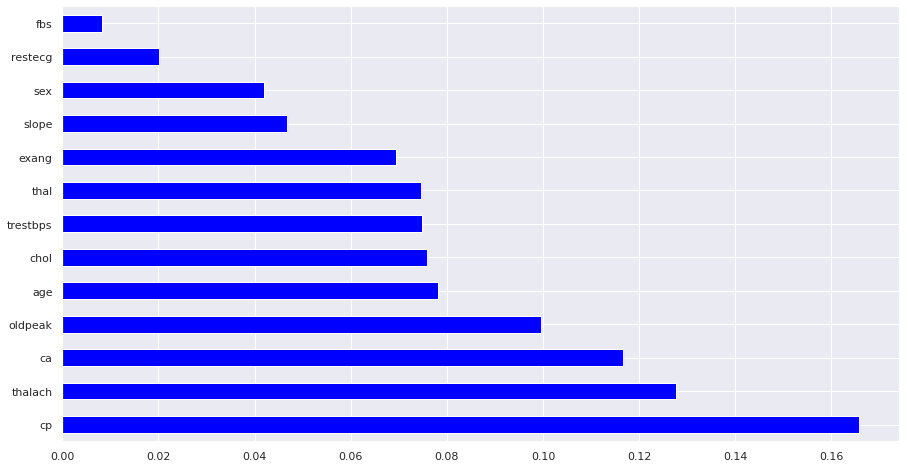

In [125]:
index= data.columns[:-1]
importance = pd.Series(model5.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

# Predictions

In [126]:
print(model5.predict(sc.transform([[25,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

[1]


In [127]:
y_pred = model5.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


In [129]:
Age = int(input("\nEnter Your Age(enter a positive interger)\n\n"))
Sex = int(input("\nEnter Your Sex\n0.FEMALE\n1.MALE \n\n"))
Cp = int(input("\nEnter Your Chest Pain Type:\n0. typical angina\n 1. atypical angina\n 2. non-anginal pain\n 3. asymptomatic\n\n"))
Trestbps = int(input("\nEnter Your Resting systolic blood pressure(in mm Hg)\n(Normal range <120 mm Hg)\n\n"))
Chol = int(input("\nEnter Your Serum cholesterol in mg/dl\n(Normal Range <200 mg/dl)\n\n"))
Fbs = int(input("\nEnter Your Fasting blood sugar>120 mg:/dl\n0. No \n1. Yes\n\n"))
Restecg = int(input("\nEnter Your Resting electrocardiograph:\n0. Normal\n1. Having ST-T wave abnormality\n2. Left ventricular hypertrophy\n\n"))
Thalach = int(input("\nEnter Your Maximum heart rate achieved\n(Normal range between 60-100 beats/minute)\n\n"))
Exang = int(input("\nEnter Your Exercise-induced angina:\n0. No\n 1. Yes\n\n"))
Oldpeak = float(input("\nEnter Your ST depression\n(Normal Range )\n\n"))
Slope = int(input("\nEnter Your slope of the peak exercise ST segment:\n0. Upsloping\n 1. Fat\n 2. Down sloping\n\n"))
Ca = int(input("\nEnter Your No. of major vessels (0–3,4=Ordinal) colored by fuoroscopy\n\n"))
Thal = int(input("\nEnter Your Defect types:\n(1 = normal; 2 = fixed defect; 3 = reversable defect)\n\n"))
mod = int(input("\nSelect Model\n\n 1. Logistic Regression\n2. Naive Bayes\n3.K-Nearest Neighbors\n4.Decision Tree\n5.Random Forest\n6.Support Vector Machine\n7.XG Boost\n8.Stochastic Gradient Descent"))

mod2 = 0
if mod == 1:
   mod2 = model1
elif mod == 2:
   mod2 = model2
elif mod == 3:
   mod2 = model3
elif mod == 4:
   mod2 = model4
elif mod == 5:
   mod2 = model5
elif mod == 6:
   mod2 = model6
elif mod == 7:
   mod2 = model7
else:
   mod2 = model8

fin = mod2.predict(sc.transform([[int(Age),int(Sex),int(Cp),int(Trestbps),float(Chol),int(Fbs),int(Restecg),float(Thalach),int(Exang),float(Oldpeak),int(Slope),int(Ca),int(Thal)]]))

fin1 = 0
if fin == 1:
   print("\nYou have Heart Disease")
else:
   print("\nYou have no heart disease")




Enter Your Age(enter a positive interger)

25

Enter Your Sex
0.FEMALE
1.MALE 

1

Enter Your Chest Pain Type:
0. typical angina
 1. atypical angina
 2. non-anginal pain
 3. asymptomatic

2

Enter Your Resting systolic blood pressure(in mm Hg)
(Normal range <120 mm Hg)

122

Enter Your Serum cholesterol in mg/dl
(Normal Range <200 mg/dl)

200

Enter Your Fasting blood sugar>120 mg:/dl
0. No 
1. Yes

1

Enter Your Resting electrocardiograph:
0. Normal
1. Having ST-T wave abnormality
2. Left ventricular hypertrophy

2

Enter Your Maximum heart rate achieved
(Normal range between 60-100 beats/minute)

135

Enter Your Exercise-induced angina:
0. No
 1. Yes

0

Enter Your ST depression
(Normal Range )

2.1

Enter Your slope of the peak exercise ST segment:
0. Upsloping
 1. Fat
 2. Down sloping

1

Enter Your No. of major vessels (0–3,4=Ordinal) colored by fuoroscopy

2

Enter Your Defect types:
(1 = normal; 2 = fixed defect; 3 = reversable defect)

1

Select Model

 1. Logistic Regression
